In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('Tesla.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [9]:
df[['Date']]=df[['Date']].apply(pd.to_datetime)
df['Date']=df['Date'].dt.strftime("%Y")
df['Date']=df['Date'].astype(np.int64)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [10]:
df.dtypes

Date           int64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

<Axes: xlabel='Volume', ylabel='Adj Close'>

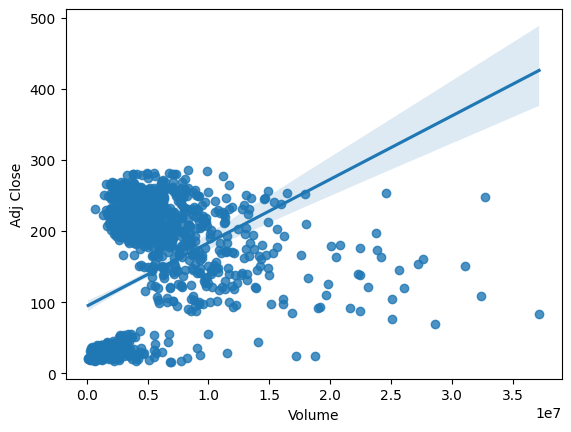

In [12]:
sns.regplot(data=df,x='Volume',y='Adj Close')

In [13]:
df.duplicated().value_counts()

False    1692
Name: count, dtype: int64

splitting

In [14]:
x=df.drop(columns=['Adj Close'])
x.head()

,Date,Open,High,Low,Close,Volume
0,2010,19.000000,25.00,17.540001,23.889999,18766300
1,2010,25.790001,30.42,23.299999,23.830000,17187100
2,2010,25.000000,25.92,20.270000,21.959999,8218800
3,2010,23.000000,23.10,18.709999,19.200001,5139800
4,2010,20.000000,20.00,15.830000,16.110001,6866900


In [15]:
y=df['Adj Close']
y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Adj Close, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler


In [18]:
std_scalar = StandardScaler()
column = list(df.columns)
column.remove('Adj Close')
x=pd.DataFrame(std_scalar.fit_transform(x),columns=column)



In [19]:
x.head()

,Date,Open,High,Low,Close,Volume
0,-1.692373,-1.203215,-1.147419,-1.211450,-1.151173,3.375219
1,-1.692373,-1.131197,-1.090764,-1.149400,-1.151809,3.007510
2,-1.692373,-1.139576,-1.137802,-1.182041,-1.171642,0.919286
3,-1.692373,-1.160789,-1.167280,-1.198846,-1.200915,0.202356
4,-1.692373,-1.192608,-1.199684,-1.229871,-1.233688,0.604503


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1184, 6), (508, 6), (1184,), (508,))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [26]:
#fitting of x train and y train into linear regreesion
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred_lin_reg=lin_reg.predict(X_test)

In [31]:
score_lin_reg= r2_score(y_test,y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test,y_pred_lin_reg)
mae_lin_reg = mean_absolute_error(y_test,y_pred_lin_reg)
rmse_lin_reg=np.sqrt(mse_lin_reg)

In [32]:
print(score_lin_reg)
print(mse_lin_reg)
print(mae_lin_reg)
print(rmse_lin_reg)

1.0
3.721609713711486e-27
5.480830137944789e-14
6.100499744866388e-14


In [33]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [34]:
y_pred_svr=svr.predict(X_test)
score_svr=r2_score(y_test,y_pred_svr)
mse_svr=mean_squared_error(y_test,y_pred_svr)
mae_svr=mean_absolute_error(y_test,y_pred_svr)
rmse_svr=np.sqrt(mse_svr)

In [35]:
print(score_svr)
print(mse_svr)
print(mae_svr)
print(rmse_svr)

0.9998158044000073
1.6720678765406114
0.8473643862376895
1.2930846362634627


In [36]:
#fitting of data into randomforrest
rand_reg=RandomForestRegressor(n_estimators=500,random_state=30)
rand_reg.fit(X_train,y_train)


RandomForestRegressor(n_estimators=500, random_state=30)

In [37]:
y_pred_rand=rand_reg.predict(X_test)

In [38]:
score_rand= r2_score(y_test,y_pred_rand)
mse_rand = mean_squared_error(y_test,y_pred_rand)
mae_rand = mean_absolute_error(y_test,y_pred_rand)
rmse_rand=np.sqrt(mse_rand)

In [39]:
print(score_rand)
print(mse_rand)
print(mae_rand)
print(rmse_rand)

0.9999806720885951
0.1754525069116771
0.17677855362202755
0.4188705132993693
